In [30]:
r2a=[ 0.9 ,1.5 , 2.2 ,2.7]
r2v=[ 60 , 70 , 90 , 130 ]
r2=[r2a,r2v,0.02]

r3a=[1.3 , 1.5 , 1.6 , 1.8 ]
r3v=[80 , 100 , 110 , 130 ]
r3=[r3a,r3v,0.03]

r4a=[1.2 , 1.3, 1.5 , 1.6 ]
r4v=[120 , 140, 180 , 200 ]
r4=[r4a,r4v,0.04]

r5a=[1.1, 1.2 , 1.3 , 1.4]
r5v=[160, 180 , 200 , 220]
r5=[r5a,r5v,0.05]

a_err = [0.1 , 0.1 , 0.1 , 0.1]
v_err = [10. , 10. , 10. , 10.]
r_err = 0.002

rr=[r2,r3,r4,r5]

qqm=[] #list for qm ratio
qqmer=[] #list for uncertainty of qm ratio

# V = qm * ( ( (r**2)*8*(mu**2)*(N**2) )/ (125* (rc**2))  ) * (I*2)



%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *


def odr(x):
    ra=x[0]
    rv=x[1]
    
    def fit_func(p, x):
        m = p
        return m*x**2

    linear = Model(fit_func)

    data = RealData(ra, rv, sx=a_err, sy=v_err)

    odr= ODR(data, linear, beta0=[0.])

    out = odr.run()

    #out.pprint()

    x_fit = np.linspace(ra[0]-0.5, ra[-1]+0.5, 1000)
    y_fit = fit_func(out.beta, x_fit)

    #plt.errorbar(ra, rv, xerr=a_err, yerr=v_err, linestyle='None', marker='x',ecolor='r')
    #plt.xlabel('Current(I)')
    #plt.ylabel('Voltage(V)')
    #plt.plot(x_fit, y_fit)



    plt.show()
    
    rc=0.2
    r=x[2]
    N=154.
    mu=12.566370614e-7
    # calculation of qm ratio (out.beta[0] is the slope)
    qqm.append((out.beta[0]/(( (r**2)*32*(mu**2)*(N**2) )/ (125* (rc**2))  )))
    # calculation of uncertainty of qm ratio by error propogation (out.sd_beta[0] is the uncertainty of slope)
    qqmer.append(np.sqrt((out.sd_beta[0]/(( (r**2)*32*(mu**2)*(N**2) )/ (125* (rc**2.))  ))**2+ ((out.beta[0]*r_err)/(( (r**3)*16.*(mu**2)*(N**2) )/ (125.* (rc)**2)  ))**2))
    print(i+2,'r(constant):',out.beta[0]) 
    print(i+2,'r(constant) sd:',out.sd_beta[0])
    
    
for i in range(4):        
    odr(rr[i])
print(qqm)
print(qqmer)
#weighted average
upp=0
down=0

for i in range(4): #upper part
    upp +=(qqm[i]/qqmer[i]**2)
for k in range(4): #bottom part
    down +=(1/qqmer[k]**2)
    
#uncertainty of weighted average 
sigma=0
for x in range(4):
    sigma+= qqmer[x]**2
    
aaa= (upp/down) #weighted average

bbb= (np.sqrt(sigma)/4) #uncertainty of weighted average
print(aaa/1e11)
print(bbb/1e11)

print('error: ',(aaa-1.758820024e11)/bbb) #Error
print((2-1.758820024)/0.2)
print(bbb/aaa)   #percantage of uncertainty

print(np.array(qqm)/1e11)
print(np.array(qqmer)/1e11)


2 r(constant): 20.505537175637564
2 r(constant) sd: 4.365639284783083
3 r(constant): 42.96441481466018
3 r(constant) sd: 1.4465857385080254
4 r(constant): 80.54644685706852
4 r(constant) sd: 1.2190679204335981
5 r(constant): 120.63473365394925
5 r(constant) sd: 4.200209755304446
[213879921393.25824, 199170607421.95786, 210031899856.3425, 201321991266.6918]
[62475868665.724686, 27389692358.150574, 21242385112.09745, 17564999387.891716]
2.041108636155341
0.1839360884546299
error:  1.5347103144741014
1.2058998799999998
0.09011577590553647
[2.13879921 1.99170607 2.100319   2.01321991]
[0.62475869 0.27389692 0.21242385 0.17564999]


Beta: [120.63473365]
Beta Std Error: [4.20020976]
Beta Covariance: [[102.54384237]]
Residual Variance: 0.17204116387346036
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


<IPython.core.display.Javascript object>


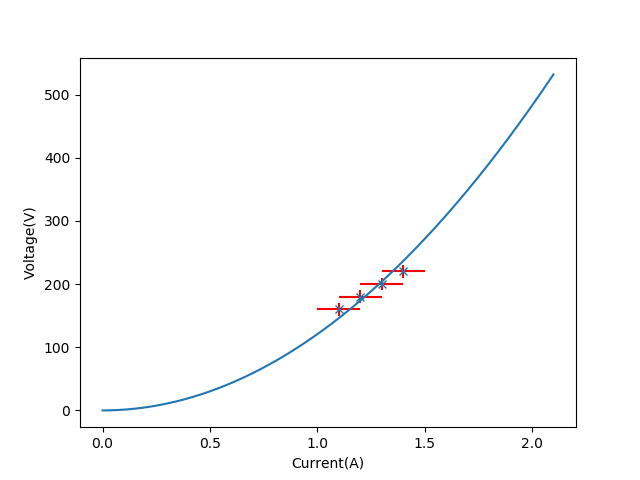

None


In [32]:
r2a=[ 0.9 ,1.5 , 2.2 ,2.7]
r2v=[ 60 , 70 , 90 , 130 ]
r2=[r2a,r2v,0.02]

r3a=[1.3 , 1.5 , 1.6 , 1.8 ]
r3v=[80 , 100 , 110 , 130 ]
r3=[r3a,r3v,0.03]

r4a=[1.2 , 1.3, 1.5 , 1.6 ]
r4v=[120 , 140, 180 , 200 ]
r4=[r4a,r4v,0.04]

r5a=[1.1, 1.2 , 1.3 , 1.4]
r5v=[160, 180 , 200 , 220]
r5=[r5a,r5v,0.05]

a_err = [0.1 , 0.1 , 0.1 , 0.1]
v_err = [10. , 10. , 10. , 10.]
r_err = 0.002

rr=[r2,r3,r4,r5]

qqm=[]
qqmer=[]

# V = qm * ( ( (r**2)*8*(mu**2)*(N**2) )/ (125* (rc**2))  ) * (I*2)



%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *


def odr(x):
    ra=x[0]
    rv=x[1]
    
    def fit_func(p, x):
        m = p
        return m*x**2

    linear = Model(fit_func)

    data = RealData(ra, rv, sx=a_err, sy=v_err)

    odr= ODR(data, linear, beta0=[0.])

    out = odr.run()

    out.pprint()

    x_fit = np.linspace(ra[0]-1.1, ra[-1]+0.7, 1000)
    y_fit = fit_func(out.beta, x_fit)

    plt.errorbar(ra, rv, xerr=a_err, yerr=v_err, linestyle='None', marker='x',ecolor='r')
    plt.xlabel('Current(A)')
    plt.ylabel('Voltage(V)')
    plt.plot(x_fit, y_fit)



    plt.show()
    

    

    
print(odr(rr[3]))

